# Análise de Texto dos programas de governo apresentados por candidatos a prefeitura de Fortaleza em 2020

In [1]:
import pdftotext
import os, re, string

import pandas as pd
import numpy as np
from nltk.corpus import stopwords

#dataviz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

# Possibilidades:
* Termos mais frequentes
* Bigramas mais frequentes
* Bigramas exclusivos
* Rede de palavras
* Análise de sentimentos
* Pos-tagging
* Modelagem de tópicos

# Carregando e limpando os dados

In [2]:
def getCandidateParty(file):
    candidateParty = file.replace('.pdf','')
    candidate_list = candidateParty.split()
    candidate = ' '.join(candidate_list[0:2])
    party = candidate_list[-1]
    party = party.replace('(','')
    party = party.replace(')','')
    return (candidateParty,candidate,party)

def cleanText(text):
    #punct = list(string.punctuation)
    remove_chars = ['\uf0b7','\n','.','!','?',';',',',':','(',')','/','\\','%','●']
    # remove footnote
    text = text.replace('Célio Studart, prefeito, Fortaleza 2020.','')
    
    for p in remove_chars:
        if p in text:
            text = text.replace(p,' ')
            
    text = text.strip()
    # remove white spaces
    text = re.sub('\d+', ' ', text)
    # remove numbers
    text = re.sub(' +', ' ', text)
    # lowercase
    text = text.lower()
    
    text = text.replace('covid','covid-19')
    return text

In [3]:
dir_path = 'pdfs/'
candidates = []
parties = []
programs = []
candidates_parties = []

for file in os.listdir(dir_path):
    
    # get name of candidate and party
    candidateParty, candidate, party = getCandidateParty(file)
    candidates.append(candidate)
    parties.append(party)
    candidates_parties.append(candidateParty)
    print(candidate, party)    

    # iterates over files and load data
    file_path = dir_path+'/'+file
    with open(file_path, "rb") as f:
        pdf = pdftotext.PDF(f)
    text = "".join(pdf)
    text = cleanText(text)
    programs.append(text)
    

Paula Colares UP
Anízio Melo PCdoB
Heitor Freire PSL
Samuel Braga Patriota
Célio Studart PV
Renato Roseno PSOL
Heitor Férrer Solidariedade
Sarto Nogueira PDT
Luizianne Lins PT
Capitão Wagner PROS


In [4]:
df = pd.DataFrame({ 'candidato/partido':candidates_parties, 
                   'candidato':candidates, 
                   'partido':parties, 
                   'programa original':programs})



In [5]:
# remoção de stop words
stop_words = list(stopwords.words('portuguese'))
final_stop_words = []
for sw in stop_words:
    sw = ' '+ sw + ' '
    final_stop_words.append(sw)
    
def removeStopwords(text):
    for sw in final_stop_words:
        text = text.replace(sw,' ')
    text = re.sub(' +', ' ', text)
    return text

df['programa'] = [removeStopwords(t) for t in df['programa original']]
df['palavras'] = [len(t.split()) for t in df['programa']]
df['types'] = [len(set(t.split())) for t in df['programa']]
df['types/palavras'] = df['types']/df['palavras'] 

In [6]:
print(len(df))
df

10


,candidato/partido,candidato,partido,programa original,programa,palavras,types,types/palavras
0,Paula Colares (UP),Paula Colares,UP,programa “por uma fortaleza popular e socialis...,programa “por fortaleza popular socialista” un...,12273,3942,0.321193
1,Anízio Melo (PCdoB),Anízio Melo,PCdoB,programa de governo profº anizio prefeito e dr...,programa governo profº anizio prefeito drª hel...,1636,863,0.527506
2,Heitor Freire (PSL),Heitor Freire,PSL,um plano de governo é uma obra em permanente c...,um plano governo obra permanente construção ap...,1164,689,0.591924
3,Samuel Braga (Patriota),Samuel Braga,Patriota,plano de governo do partido patriota municipal...,plano governo partido patriota municipal forta...,678,442,0.651917
4,Célio Studart (PV),Célio Studart,PV,fortaleza verde diretrizes para plano de gover...,fortaleza verde diretrizes plano governo parti...,5430,2418,0.445304
5,Renato Roseno (PSOL),Renato Roseno,PSOL,sumário executivo fortaleza da gente para uma ...,sumário executivo fortaleza gente cidade justa...,23285,6151,0.264161
6,Heitor Férrer (Solidariedade),Heitor Férrer,Solidariedade,diretrizes de governo – prefeito heitor férrer...,diretrizes governo – prefeito heitor férrer vi...,1042,600,0.575816
7,Sarto Nogueira (PDT),Sarto Nogueira,PDT,diretrizes gerais para a elaboração do plano d...,diretrizes gerais elaboração plano governo col...,1197,659,0.550543
8,Luizianne Lins (PT),Luizianne Lins,PT,luizianne lins e vladyson viana - partido dos ...,luizianne lins vladyson viana - partido trabal...,2925,1440,0.492308
9,Capitão Wagner (PROS),Capitão Wagner,PROS,diretrizes para a construção do plano de gover...,diretrizes construção plano governo participat...,2387,1006,0.421450


In [7]:
for c in list(df['candidato/partido']):
    print(c,end=', ')

Paula Colares (UP), Anízio Melo (PCdoB), Heitor Freire (PSL), Samuel Braga (Patriota), Célio Studart (PV), Renato Roseno (PSOL), Heitor Férrer (Solidariedade), Sarto Nogueira (PDT), Luizianne Lins (PT), Capitão Wagner (PROS), 

In [94]:
# example of processed text
df[df['candidato']=='Renato Roseno']['programa'].values[0]

'sumário executivo fortaleza gente cidade justa aberta inovadora ecológica @ galbanogueira coligação psol pcb - organizar luta esperança www organizaraesperanca sumário executivo programa coligação psol pcb - organizar luta esperança fruto larga trajetória experiências diálogo elaboração análises propostas diferentes sujeitos integrantes partidos compõe coligação pesquisadores movimentos sociais organização sociedade civil últimos dois meses realizado ciclo programa participativo composto espaços virtuais debateram temas centrais apresentados neste programa organizado quatro grandes eixos cidade justa aberta inovadora ecológica compreendendo elaboração fortaleza gente encerra apresentação deste documento deve envolver toda cidade criado site participativo meio população pode deixar ideias cidade neste sumário executivo apresentadas perspectiva orienta projeto cidade aqui apresentado bem principais propostas constam documento mundo vivencia crise ambiental econômica comprova limite orga

# Quantidade de palavras

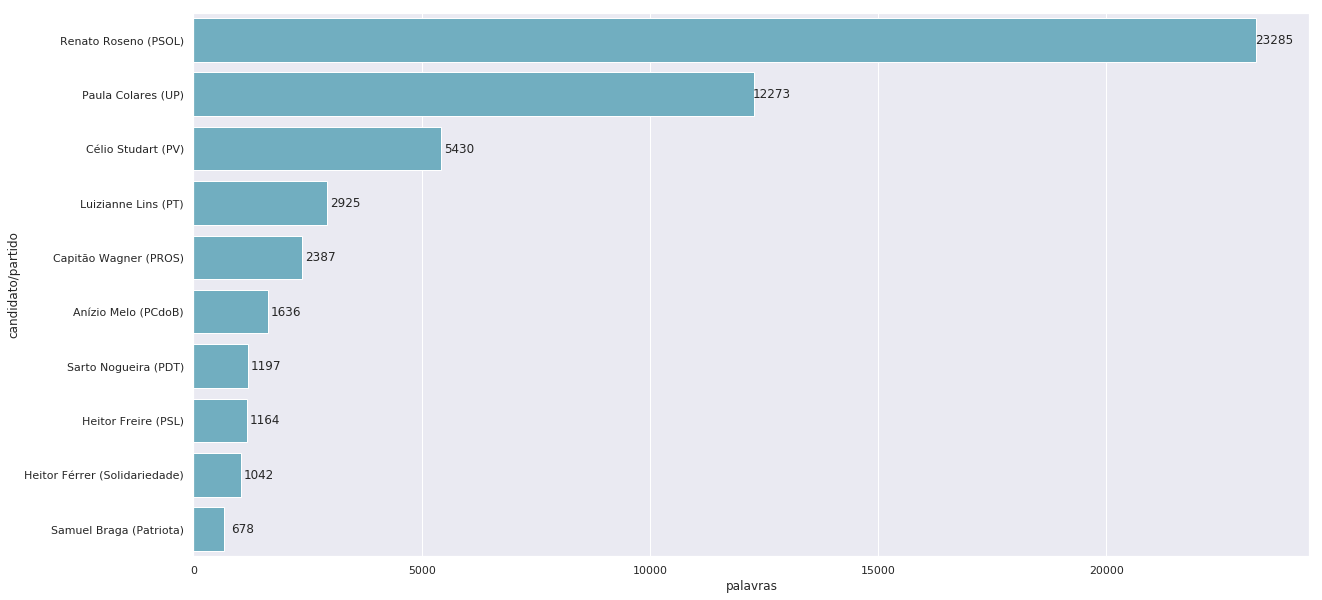

In [9]:
df = df.sort_values(by='palavras',ascending=False)
keys = df['candidato/partido']
values = df['palavras']
sns.set(style="darkgrid")

# plt.figure(figsize=(10, 6))

# plt.xticks(values, keys, rotation='vertical')
# g = sns.barplot(x=keys, y=values, color = 'C9') 
# for p in g.patches:
#     g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
#                                                p.get_height()), ha = 'center', 
#                va = 'center', xytext = (0, 5), textcoords = 'offset points') 

plt.figure(figsize=(20, 10))
#plt.title('Quantidade de palavras em cada programa de governo')
g = sns.barplot(x=values, y=keys, color = 'C9') 
for p in g.patches:
    g.annotate(format(p.get_width(), '.0f'), (p.get_width(), 
                                               p.get_y() + p.get_height()/2.), ha = 'center', 
               va = 'center', xytext = (18, 0), textcoords = 'offset points')
    
plt.savefig('plots/palavras_programas.png',dpi=150)
plt.show()


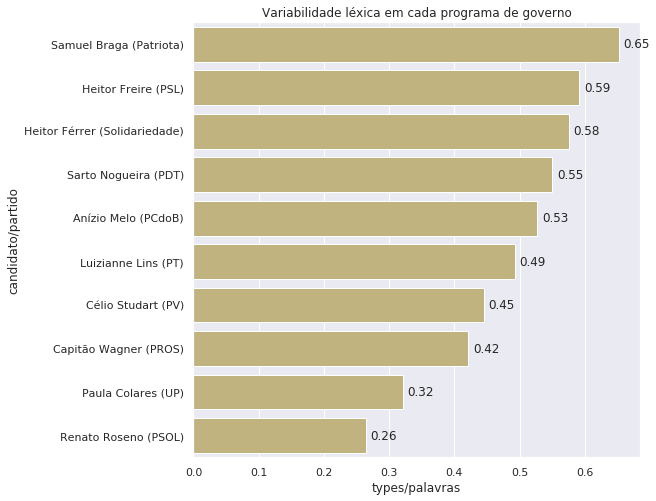

In [10]:
df = df.sort_values(by='types/palavras',ascending=False)
keys = df['candidato/partido']
values = df['types/palavras']

# plt.figure(figsize=(10, 6))

# plt.xticks(values, keys, rotation='vertical')
# g = sns.barplot(x=keys, y=values, color = 'C9') 
# for p in g.patches:
#     g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
#                                                p.get_height()), ha = 'center', 
#                va = 'center', xytext = (0, 5), textcoords = 'offset points') 

plt.figure(figsize=(8, 8))
plt.title('Variabilidade léxica em cada programa de governo')
g = sns.barplot(x=values, y=keys, color = 'C8') 
for p in g.patches:
    g.annotate(format(p.get_width(), '.2f'), (p.get_width(), 
                                               p.get_y() + p.get_height()/2.), ha = 'center', 
               va = 'center', xytext = (18, 0), textcoords = 'offset points')
    
plt.savefig('plots/types_programas.png')
plt.show()


# Termos mais frequentes 

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
def get_top_n_ngrams(corpus, ngram = (1,1), n=None):
    if type(corpus) == str:
        corpus = [corpus]
    vec = CountVectorizer(ngram_range = ngram).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def build_ngram_df(corpus, ngram = (1,1), n=None,):
    ngrams = get_top_n_ngrams(corpus, ngram, n)
    df1 = pd.DataFrame(ngrams, columns = ['ngrams' , 'count'])
    df1 = df1.groupby('ngrams').sum()['count'].sort_values(ascending=False)
    return df1

def plotNgrams(ngrams, col = 'C0', orientation = 'vertical'):
    labels = list(ngrams.index)
    values = list(ngrams.values)
    #
    if orientation == 'vertical':
        g = sns.barplot(y=labels, x=values, color = col)
        for p in g.patches:
            g.annotate(format(p.get_width(), '.0f'), (p.get_width(), 
                                                       p.get_y() + p.get_height()/2.), ha = 'center', 
                       va = 'center', xytext = (10, 0), textcoords = 'offset points')
    else:
        plt.xticks(values, labels, rotation='vertical')
        g = sns.barplot(x=labels, y=values, color = col) 
        for p in g.patches:
            g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                                       p.get_height()), ha = 'center', 
                       va = 'center', xytext = (0, 5), textcoords = 'offset points') 
    

## Total

457537


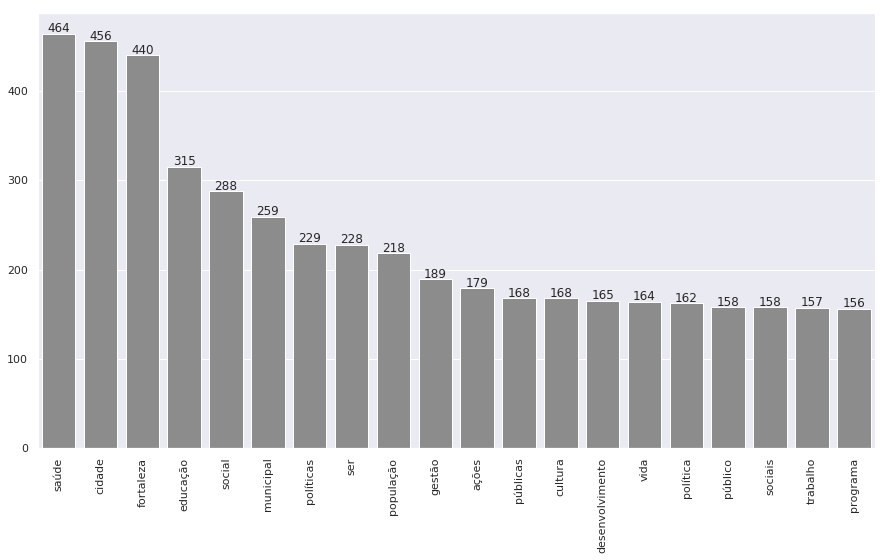

In [56]:
total = ' '.join(list(df['programa']))
print(len(total))

plt.figure(figsize=(15, 8))
#plt.title('Termos mais mencionados em todos os programas')
total_bigrams = build_ngram_df(total, ngram = (1,1), n=20)
plotNgrams(total_bigrams,col='C7', orientation = 'horizontal')
    
plt.savefig('plots/palavras_total.png',dpi=150)
plt.show()

## Por candidato
Dividimos a análise entre os candidatos que pontuaram e que não pontuaram na última pesquisa Datafolha/O Povo:
https://www.opovo.com.br/noticias/politica/2020/10/17/pesquisa-datafolha-fortaleza--capitao-wagner-33---luizianne-24--e-sarto-15.html


In [61]:
topNgrams = 10

In [62]:
##################################################################################
# essa ideia vai ficar em standby por enquanto, já que faltam só 4 candidatos...
##################################################################################
#separa os primeiros colocados nas pesquisas dos que não pontuaram em dois dicionarios 
#https://www.opovo.com.br/noticias/politica/2020/10/17/pesquisa-datafolha-fortaleza--capitao-wagner-33---luizianne-24--e-sarto-15.html

df_indexed = df.set_index('candidato/partido')

primeiros = ['Heitor Férrer (Solidariedade)', 'Sarto Nogueira (PDT)',
             'Luizianne Lins (PT)', 'Célio Studart (PV)',
             'Capitão Wagner (PROS)', 'Renato Roseno (PSOL)']

ultimos = ['Samuel Braga (Patriota)', 'Heitor Freire (PSL)',
           'Anízio Melo (PCdoB)', 'Paula Colares (UP)']

df_primeiros = df_indexed.loc[primeiros]['programa']
df_ultimos = df_indexed.loc[ultimos]['programa']

primeiros_dict = df_primeiros.to_dict()
ultimos_dict = df_ultimos.to_dict()

## Candidatos que pontuaram nas pesquisas

In [63]:
roseno = df[df['candidato']=='Renato Roseno']['programa'].values[0]
sarto = df[df['candidato']=='Sarto Nogueira']['programa'].values[0]
wagner = df[df['candidato']=='Capitão Wagner']['programa'].values[0]
celio = df[df['candidato']=='Célio Studart']['programa'].values[0]
lora = df[df['candidato']=='Luizianne Lins']['programa'].values[0]
heitorferrer = df[df['candidato']=='Heitor Férrer']['programa'].values[0]

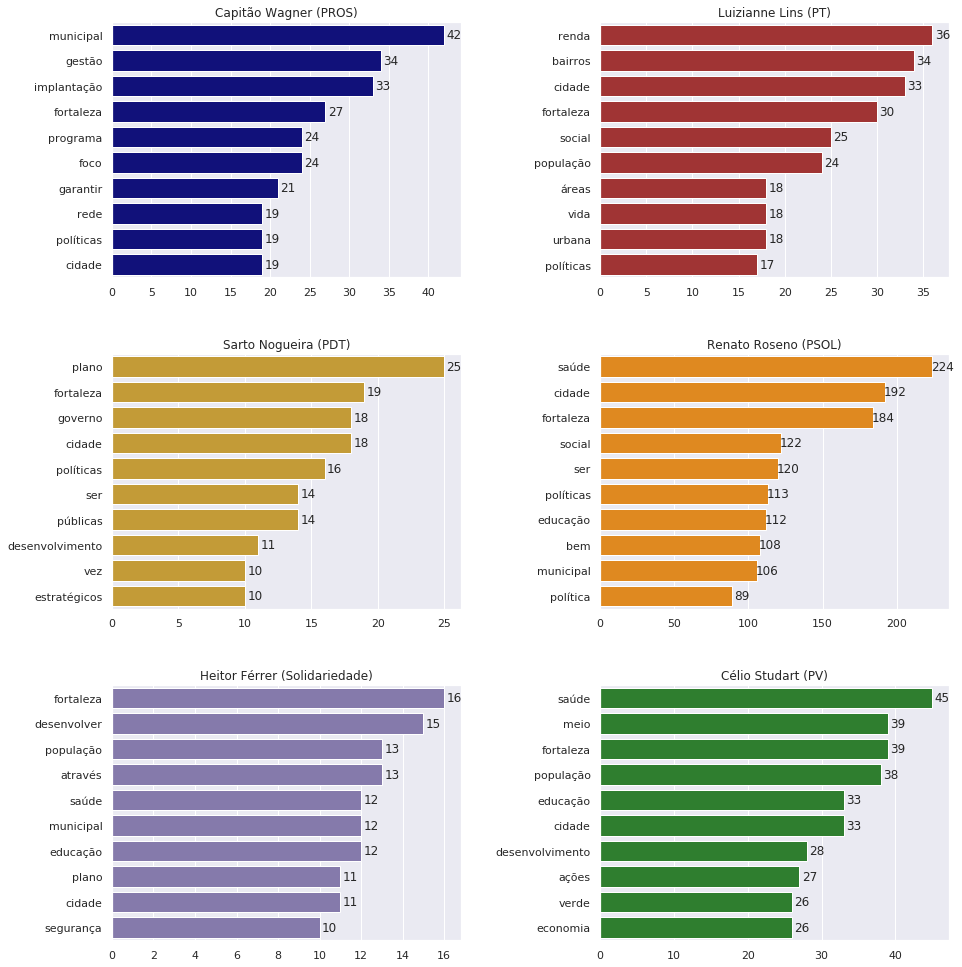

In [64]:
#unigrams
plt.figure(figsize=(15, 15))
#plt.suptitle("10 termos frequentes", fontsize=14)
ngrams_range = (1,1)
plt.subplot(321)
plt.title('Capitão Wagner (PROS)')
wagner_unigrams = build_ngram_df(wagner, ngram = ngrams_range, n=topNgrams)
plotNgrams(wagner_unigrams,col='darkblue')

plt.subplot(322)
plt.title('Luizianne Lins (PT)')
lora_unigrams = build_ngram_df(lora, ngram = ngrams_range, n=topNgrams)
plotNgrams(lora_unigrams,col='firebrick')

plt.subplot(323)
plt.title('Sarto Nogueira (PDT)')
sarto_unigrams = build_ngram_df(sarto, ngram = ngrams_range, n=topNgrams)
plotNgrams(sarto_unigrams,col='goldenrod')

plt.subplot(324)
plt.title('Renato Roseno (PSOL)')
roseno_unigrams = build_ngram_df(roseno, ngram = ngrams_range, n=topNgrams)
plotNgrams(roseno_unigrams,col='darkorange')

plt.subplot(325)
plt.title('Heitor Férrer (Solidariedade)')
heitorferrer_unigrams = build_ngram_df(heitorferrer, ngram = ngrams_range, n=topNgrams)
plotNgrams(heitorferrer_unigrams,col='C4')

plt.subplot(326)
plt.title('Célio Studart (PV)')
celio_unigrams = build_ngram_df(celio, ngram = ngrams_range, n=topNgrams)
plotNgrams(celio_unigrams,col='forestgreen')


plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.95, 
                    wspace=0.4, 
                    hspace=0.3)
plt.savefig('plots/top10_unigramas.png',dpi=150)
plt.show()

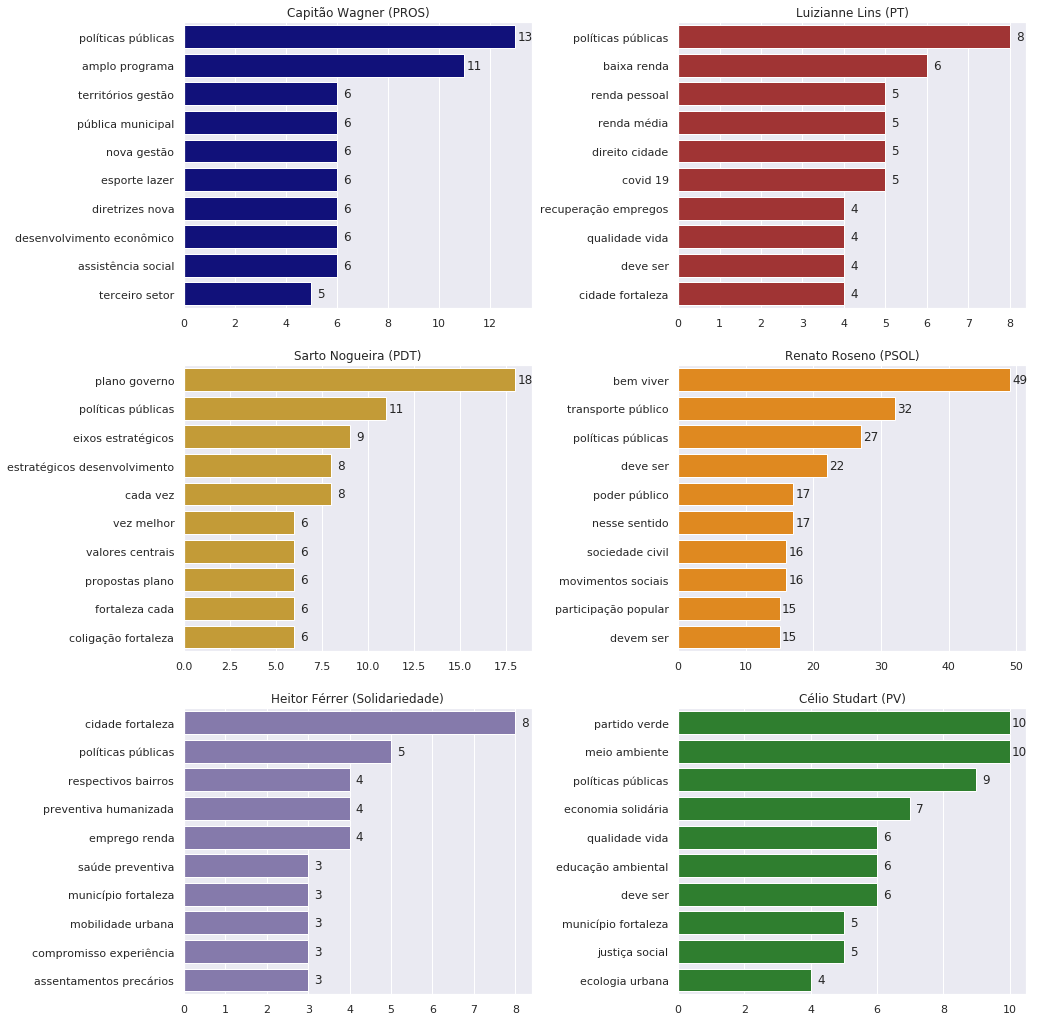

In [91]:
#bigrams
plt.figure(figsize=(15, 15))
ngrams_range = (2,2)
#plt.suptitle("10 bigramas mais frequentes", fontsize=14)
plt.subplot(321)
plt.title('Capitão Wagner (PROS)')
wagner_bigrams = build_ngram_df(wagner, ngram = ngrams_range, n=topNgrams)
plotNgrams(wagner_bigrams,col='darkblue')

plt.subplot(322)
plt.title('Luizianne Lins (PT)')
lora_bigrams = build_ngram_df(lora, ngram = ngrams_range, n=topNgrams)
plotNgrams(lora_bigrams,col='firebrick')

plt.subplot(323)
plt.title('Sarto Nogueira (PDT)')
sarto_bigrams = build_ngram_df(sarto, ngram = ngrams_range, n=topNgrams)
plotNgrams(sarto_bigrams,col='goldenrod')

plt.subplot(324)
plt.title('Renato Roseno (PSOL)')
roseno_bigrams = build_ngram_df(roseno, ngram = ngrams_range, n=topNgrams)
plotNgrams(roseno_bigrams,col='darkorange')

plt.subplot(325)
plt.title('Heitor Férrer (Solidariedade)')
heitorferrer_bigrams = build_ngram_df(heitorferrer, ngram = ngrams_range, n=topNgrams)
plotNgrams(heitorferrer_bigrams,col='C4')

plt.subplot(326)
plt.title('Célio Studart (PV)')
celio_bigrams = build_ngram_df(celio, ngram = ngrams_range, n=topNgrams)
plotNgrams(celio_bigrams,col='forestgreen')


plt.subplots_adjust(left=0.17,
                    bottom=0.05, 
                    right=0.95, 
                    top=0.95, 
                    wspace=0.42, 
                    hspace=0.2)
plt.savefig('plots/top10_bigramas.png',dpi=150)
plt.show()

## Candidatos que não pontuaram nas pesquisas

In [19]:
paulacolares = df[df['candidato']=='Paula Colares']['programa'].values[0]
aniziomelo = df[df['candidato']=='Anízio Melo']['programa'].values[0]
heitorfreire = df[df['candidato']=='Heitor Freire']['programa'].values[0]
samuelbraga = df[df['candidato']=='Samuel Braga']['programa'].values[0]

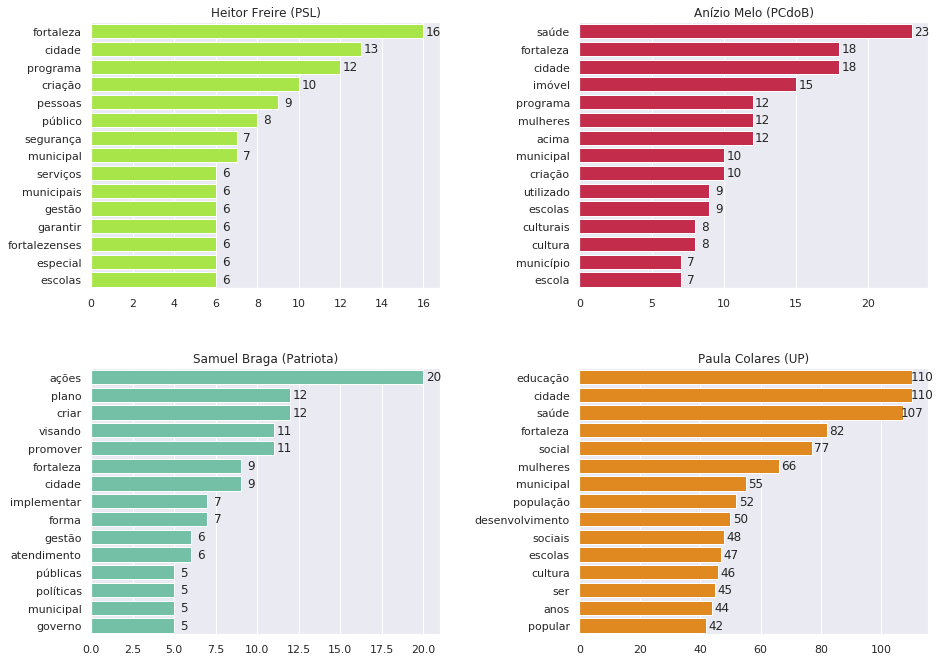

In [20]:
#unigrams

ngrams_range = (1,1)
plt.figure(figsize=(15, 10))
#plt.suptitle("10 termos frequentes", fontsize=14)
ngrams_range = (1,1)
plt.subplot(221)
plt.title('Heitor Freire (PSL)')
heitorfreire_unigrams = build_ngram_df(heitorfreire, ngram = ngrams_range, n=topNgrams)
plotNgrams(heitorfreire_unigrams,col='greenyellow')

plt.subplot(222)
plt.title('Anízio Melo (PCdoB)')
aniziomelo_unigrams = build_ngram_df(aniziomelo, ngram = ngrams_range, n=topNgrams)
plotNgrams(aniziomelo_unigrams,col='crimson')

plt.subplot(223)
plt.title('Samuel Braga (Patriota)')
samuelbraga_unigrams = build_ngram_df(samuelbraga, ngram = ngrams_range, n=topNgrams)
plotNgrams(samuelbraga_unigrams,col='mediumaquamarine')

plt.subplot(224)
plt.title('Paula Colares (UP)')
paulacolares_unigrams = build_ngram_df(paulacolares, ngram = ngrams_range, n=topNgrams)
plotNgrams(paulacolares_unigrams,col='darkorange')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.95, 
                    wspace=0.4, 
                    hspace=0.3)
plt.savefig('plots/top10_unigramas_ultimos.png',dpi=150)
plt.show()

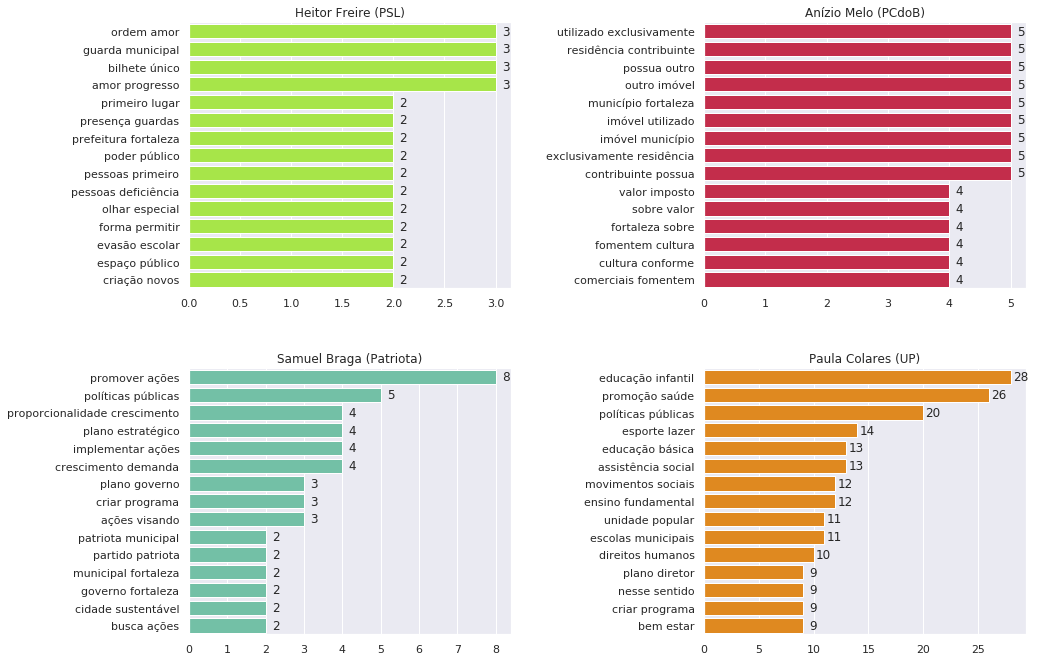

In [21]:
#bigrams
ngrams_range = (2,2)
plt.figure(figsize=(15, 10))
#plt.suptitle("10 termos frequentes", fontsize=14)
plt.subplot(221)
plt.title('Heitor Freire (PSL)')
heitorfreire_bigrams = build_ngram_df(heitorfreire, ngram = ngrams_range, n=topNgrams)
plotNgrams(heitorfreire_bigrams,col='greenyellow')

plt.subplot(222)
plt.title('Anízio Melo (PCdoB)')
aniziomelo_bigrams = build_ngram_df(aniziomelo, ngram = ngrams_range, n=topNgrams)
plotNgrams(aniziomelo_bigrams,col='crimson')

plt.subplot(223)
plt.title('Samuel Braga (Patriota)')
samuelbraga_bigrams = build_ngram_df(samuelbraga, ngram = ngrams_range, n=topNgrams)
plotNgrams(samuelbraga_bigrams,col='mediumaquamarine')

plt.subplot(224)
plt.title('Paula Colares (UP)')
paulacolares_bigrams = build_ngram_df(paulacolares, ngram = ngrams_range, n=topNgrams)
plotNgrams(paulacolares_bigrams,col='darkorange')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.95, 
                    wspace=0.6, 
                    hspace=0.3)

plt.savefig('plots/top10_bigramas_ultimos.png',dpi=150)
plt.show()

# Exclusividade de termos

In [22]:
ngrams_range = (2,2)

roseno_bigrams = build_ngram_df(roseno, ngram = ngrams_range, n=None)
roseno_set = set(roseno_bigrams.index)

wagner_bigrams = build_ngram_df(wagner, ngram = ngrams_range, n=None)
wagner_set = set(wagner_bigrams.index)

sarto_bigrams = build_ngram_df(sarto, ngram = ngrams_range, n=None)
sarto_set = set(sarto_bigrams.index)

lora_bigrams = build_ngram_df(lora, ngram = ngrams_range, n=None)
lora_set = set(lora_bigrams.index)

heitorferrer_bigrams = build_ngram_df(heitorferrer, ngram = ngrams_range, n=None)
heitorferrer_set = set(heitorferrer_bigrams.index)

celio_bigrams = build_ngram_df(celio, ngram = ngrams_range, n=None)
celio_set = set(celio_bigrams.index)

#não pontuaram

paulacolares_bigrams = build_ngram_df(paulacolares, ngram = ngrams_range, n=None)
paulacolares_set = set(paulacolares_bigrams.index)

aniziomelo_bigrams = build_ngram_df(aniziomelo, ngram = ngrams_range, n=None)
aniziomelo_set = set(aniziomelo_bigrams.index)

samuelbraga_bigrams = build_ngram_df(samuelbraga, ngram = ngrams_range, n=None)
samuelbraga_set = set(samuelbraga_bigrams.index)

heitorfreire_bigrams = build_ngram_df(heitorfreire, ngram = ngrams_range, n=None)
heitorfreire_set = set(heitorfreire_bigrams.index)



In [23]:
# termos comuns em todos os planos
intersect = set.intersection(roseno_set,lora_set,wagner_set,sarto_set,lora_set,heitorferrer_set,celio_set,heitorfreire_set,paulacolares_set,samuelbraga_set,aniziomelo_set)
print(len(intersect))
intersect

0


set()

In [24]:
# termos comuns aos planos mais cotados
intersect = set.intersection(roseno_set,lora_set,wagner_set,sarto_set,lora_set,heitorferrer_set,celio_set)
print(len(intersect))
intersect

7


{'cidade fortaleza',
 'construção coletiva',
 'educação saúde',
 'emprego renda',
 'meio ambiente',
 'poder público',
 'políticas públicas'}

# Exclusivos

In [25]:
bigrams_range = 15

In [26]:
set_ultimos = set.union(paulacolares_set,heitorfreire_set,aniziomelo_set,samuelbraga_set)

In [27]:
roseno_dif = roseno_set.difference(lora_set,wagner_set,sarto_set,lora_set,heitorferrer_set,celio_set,set_ultimos)
print(len(roseno_dif))
roseno_exclusive = [t for t in roseno_bigrams.index if t in roseno_dif]
roseno_exclusive = roseno_bigrams[roseno_exclusive][0:bigrams_range]
#roseno_exclusive

17768


In [28]:
wagner_dif = wagner_set.difference(roseno_set,lora_set,sarto_set,lora_set,heitorferrer_set,celio_set,set_ultimos)
print(len(wagner_dif))
wagner_exclusive = [t for t in wagner_bigrams.index if t in wagner_dif]
wagner_exclusive = wagner_bigrams[wagner_exclusive][0:bigrams_range]
#wagner_exclusive

1615


In [29]:
sarto_dif = sarto_set.difference(roseno_set,lora_set,wagner_set,lora_set,heitorferrer_set,celio_set,set_ultimos)
print(len(sarto_dif))
sarto_exclusive = [t for t in sarto_bigrams.index if t in sarto_dif]
sarto_exclusive = sarto_bigrams[sarto_exclusive][0:bigrams_range]
#sarto_exclusive

855


In [30]:
lora_dif = lora_set.difference(roseno_set,sarto_set,wagner_set,heitorferrer_set,celio_set,set_ultimos)
print(len(lora_dif))
lora_exclusive = [t for t in lora_bigrams.index if t in lora_dif]
lora_exclusive = lora_bigrams[lora_exclusive][0:bigrams_range]
#lora_exclusive

2266


In [31]:
celio_dif = celio_set.difference(roseno_set,sarto_set,wagner_set,heitorferrer_set,lora_set,set_ultimos)
print(len(celio_dif))
celio_exclusive = [t for t in celio_bigrams.index if t in celio_dif]
celio_exclusive = celio_bigrams[celio_exclusive][0:bigrams_range]
#celio_exclusive

4344


In [32]:
heitorferrer_dif = heitorferrer_set.difference(roseno_set,sarto_set,wagner_set,celio_set,lora_set,set_ultimos)
print(len(heitorferrer_dif))
heitorferrer_exclusive = [t for t in heitorferrer_bigrams.index if t in heitorferrer_dif]
heitorferrer_exclusive = heitorferrer_bigrams[heitorferrer_exclusive][0:bigrams_range]
#heitorferrer_exclusive

750


##### Ultimos

In [33]:
heitorfreire_dif = heitorfreire_set.difference(roseno_set,sarto_set,wagner_set,celio_set,lora_set,heitorferrer_set,paulacolares_set,aniziomelo_set, samuelbraga_set)
print(len(heitorfreire_dif))
heitorfreire_exclusive = [t for t in heitorfreire_bigrams.index if t in heitorfreire_dif]
heitorfreire_exclusive = heitorfreire_bigrams[heitorfreire_exclusive][0:bigrams_range]

842


In [34]:
paulacolares_dif = paulacolares_set.difference(roseno_set,sarto_set,wagner_set,celio_set,lora_set,heitorferrer_set,heitorfreire_set,aniziomelo_set, samuelbraga_set)
print(len(paulacolares_dif))
paulacolares_exclusive = [t for t in paulacolares_bigrams.index if t in paulacolares_dif]
paulacolares_exclusive = paulacolares_bigrams[paulacolares_exclusive][0:bigrams_range]

9392


In [35]:
aniziomelo_dif = aniziomelo_set.difference(roseno_set,sarto_set,wagner_set,celio_set,lora_set,heitorferrer_set,heitorfreire_set,paulacolares_set, samuelbraga_set)
print(len(aniziomelo_dif))
aniziomelo_exclusive = [t for t in aniziomelo_bigrams.index if t in aniziomelo_dif]
aniziomelo_exclusive = aniziomelo_bigrams[aniziomelo_exclusive][0:bigrams_range]

1088


In [36]:
samuelbraga_dif = samuelbraga_set.difference(roseno_set,sarto_set,wagner_set,celio_set,lora_set,heitorferrer_set, heitorfreire_set, aniziomelo_set, paulacolares_set)
print(len(samuelbraga_dif))
samuelbraga_exclusive = [t for t in samuelbraga_bigrams.index if t in samuelbraga_dif]
samuelbraga_exclusive = samuelbraga_bigrams[samuelbraga_exclusive][0:bigrams_range]

455


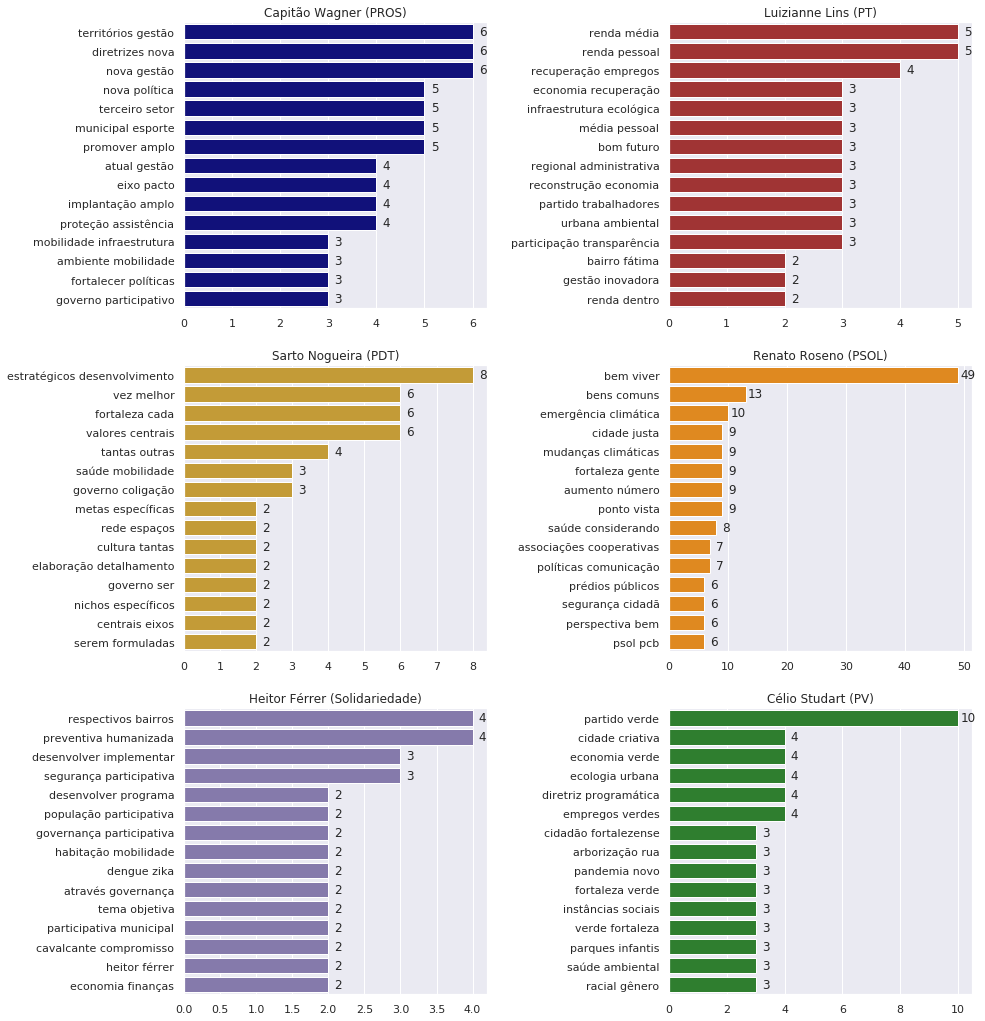

In [101]:
#bigrams
plt.figure(figsize=(15, 15))
#plt.suptitle("10 termos exclusivos mais frequentes", fontsize=14)

plt.subplot(321)
plt.title('Capitão Wagner (PROS)')
plotNgrams(wagner_exclusive,col='darkblue')

plt.subplot(322)
plt.title('Luizianne Lins (PT)')
plotNgrams(lora_exclusive,col='firebrick')

plt.subplot(323)
plt.title('Sarto Nogueira (PDT)')
plotNgrams(sarto_exclusive,col='goldenrod')

plt.subplot(324)
plt.title('Renato Roseno (PSOL)')
plotNgrams(roseno_exclusive,col='darkorange')

plt.subplot(325)
plt.title('Heitor Férrer (Solidariedade)')
plotNgrams(heitorferrer_exclusive,col='C4')

plt.subplot(326)
plt.title('Célio Studart (PV)')
plotNgrams(celio_exclusive,col='forestgreen')


plt.subplots_adjust(left=0.17,
                    bottom=0.05, 
                    right=0.9, 
                    top=0.95, 
                    wspace=0.6, 
                    hspace=0.2)
plt.savefig('plots/bigramas_exclusivos.png',dpi=150)
plt.show()

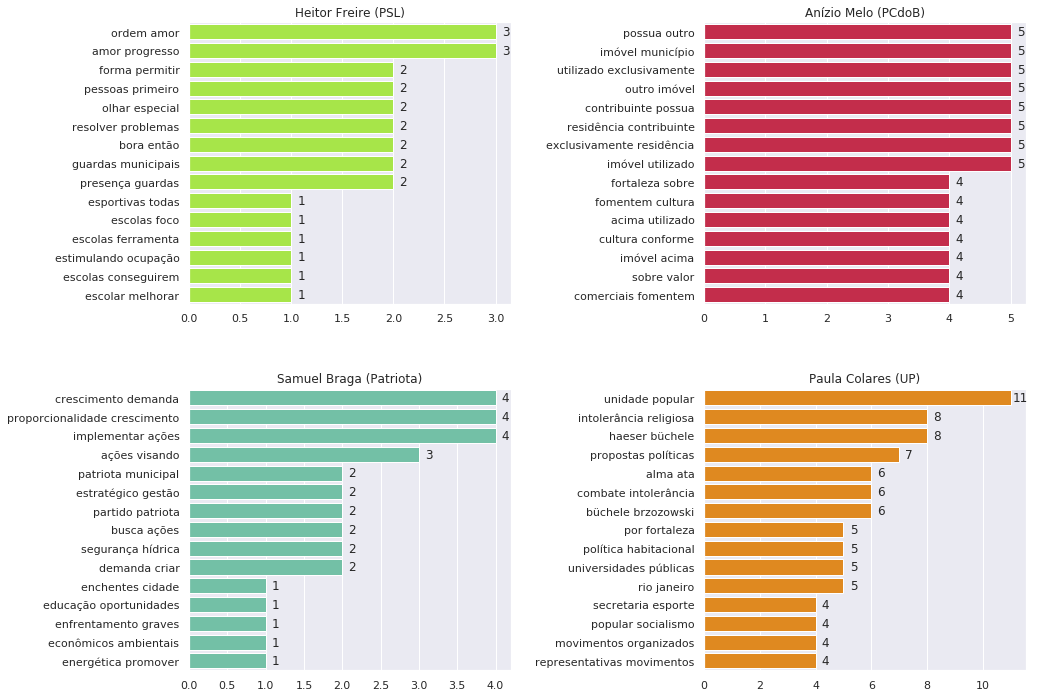

In [99]:
#bigrams
plt.figure(figsize=(15, 10))
#plt.suptitle("10 termos frequentes", fontsize=14)
plt.subplot(221)
plt.title('Heitor Freire (PSL)')
plotNgrams(heitorfreire_exclusive,col='greenyellow')

plt.subplot(222)
plt.title('Anízio Melo (PCdoB)')
plotNgrams(aniziomelo_exclusive,col='crimson')

plt.subplot(223)
plt.title('Samuel Braga (Patriota)')
plotNgrams(samuelbraga_exclusive,col='mediumaquamarine')

plt.subplot(224)
plt.title('Paula Colares (UP)')
plotNgrams(paulacolares_exclusive,col='darkorange')

plt.subplots_adjust(left=0.125,
                    bottom=0.05, 
                    right=0.9, 
                    top=0.95, 
                    wspace=0.6, 
                    hspace=0.3)

plt.savefig('plots/bigramas_exclusivos_ultimos.png',dpi=150)
plt.show()

# Rede interativa

In [39]:
from pyvis.network import Network

In [40]:
def createNetworkBigrams(candidate, bigrams, max_range = 100):
    ngrams = [(t.split()[0],t.split()[1]) for t in bigrams.index[0:max_range]]
    values = [int(i) for i in bigrams.values[0:max_range]]
    d = dict(zip(ngrams,values))
    
    net = Network(width = '1250', height = '800px',notebook = True, directed=True)
    # Create connections between nodes
    for k in d:
        #print(k[0] + "," + k[1] + str(d[k]))
        net.add_node(k[0], label = k[0], value = d[k])
        net.add_node(k[1], label = k[1], value = d[k])
        net.add_edge(k[0], k[1])#, weight = d[k]*100)
    #net.show_buttons(filter_=['physics'])
    network_file = 'networks/'+candidate+'_network.html'
    net.save_graph(network_file)
    net.show(network_file)

In [41]:
createNetworkBigrams('renato_roseno', roseno_bigrams, max_range = 50)
createNetworkBigrams('luizianne_linz', lora_bigrams, max_range = 50)
createNetworkBigrams('capitao_wagner', wagner_bigrams, max_range = 50)
createNetworkBigrams('heitor_ferrer', heitorferrer_bigrams, max_range = 50)
createNetworkBigrams('celio_studart', celio_bigrams, max_range = 50)
createNetworkBigrams('sarto_nogueira', sarto_bigrams, max_range = 50)

# Pos-tagging

In [42]:
import spacy
from collections import Counter

In [43]:
nlp = spacy.load('pt_core_news_sm')

In [44]:
doc = nlp(sarto)
pos = []
for token in doc:
    pos.append(token.pos_)


In [45]:
dc = dict(Counter(pos))
dc

{'PROPN': 177,
 'NOUN': 337,
 'ADJ': 302,
 'ADV': 42,
 'VERB': 205,
 'AUX': 44,
 'ADP': 18,
 'NUM': 8,
 'SYM': 9,
 'DET': 56,
 'PUNCT': 3,
 'X': 3,
 'PRON': 4}

In [46]:
for k in dc:
    print(k)

PROPN
NOUN
ADJ
ADV
VERB
AUX
ADP
NUM
SYM
DET
PUNCT
X
PRON
